In [1]:
# import libraries
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt


In [2]:
# Read the dataset
dataSet  = pd.read_csv("DataSet/app-store-apple-data-set-10k-apps/AppleStore.csv")

In [3]:
dataSet.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [4]:
#  Check for null values
dataSet.isnull().sum() # there are no null values

Unnamed: 0          0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

In [5]:
# Check for column types
dataSet.dtypes

Unnamed: 0            int64
id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object

In [6]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
Unnamed: 0          7197 non-null int64
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(9), object(5)
memory usage: 955.9+ KB


In [7]:
# Check the dataset shape
dataSet.shape

(7197, 17)

In [8]:
#  Drop the index and currency columns
dataSet.drop(labels=['Unnamed: 0', 'currency'], axis=1, inplace=True)

In [9]:
dataSet.prime_genre.unique()

array(['Games', 'Productivity', 'Weather', 'Shopping', 'Reference',
       'Finance', 'Music', 'Utilities', 'Travel', 'Social Networking',
       'Sports', 'Business', 'Health & Fitness', 'Entertainment',
       'Photo & Video', 'Navigation', 'Education', 'Lifestyle',
       'Food & Drink', 'News', 'Book', 'Medical', 'Catalogs'],
      dtype=object)

In [10]:
# Add the get_dummies columns to the originla Dataframe
dataSet = pd.concat([dataSet, pd.get_dummies(dataSet['prime_genre'], prefix_sep="genre", dummy_na=True)], axis = 1)

In [11]:
# dataSet['cont_rating'].unique()

In [12]:
# Remove the '+' sign at the end of the rating values
dataSet['cont_rating']= [each.replace('+', '') for each in dataSet['cont_rating']]

# Typecasting  content Rating column to int type
dataSet['cont_rating'] = dataSet['cont_rating'].map(lambda x: int(x))

In [13]:
dataSet.dtypes

id                     int64
track_name            object
size_bytes             int64
price                float64
rating_count_tot       int64
rating_count_ver       int64
user_rating          float64
user_rating_ver      float64
ver                   object
cont_rating            int64
prime_genre           object
sup_devices.num        int64
ipadSc_urls.num        int64
lang.num               int64
vpp_lic                int64
Book                   uint8
Business               uint8
Catalogs               uint8
Education              uint8
Entertainment          uint8
Finance                uint8
Food & Drink           uint8
Games                  uint8
Health & Fitness       uint8
Lifestyle              uint8
Medical                uint8
Music                  uint8
Navigation             uint8
News                   uint8
Photo & Video          uint8
Productivity           uint8
Reference              uint8
Shopping               uint8
Social Networking      uint8
Sports        

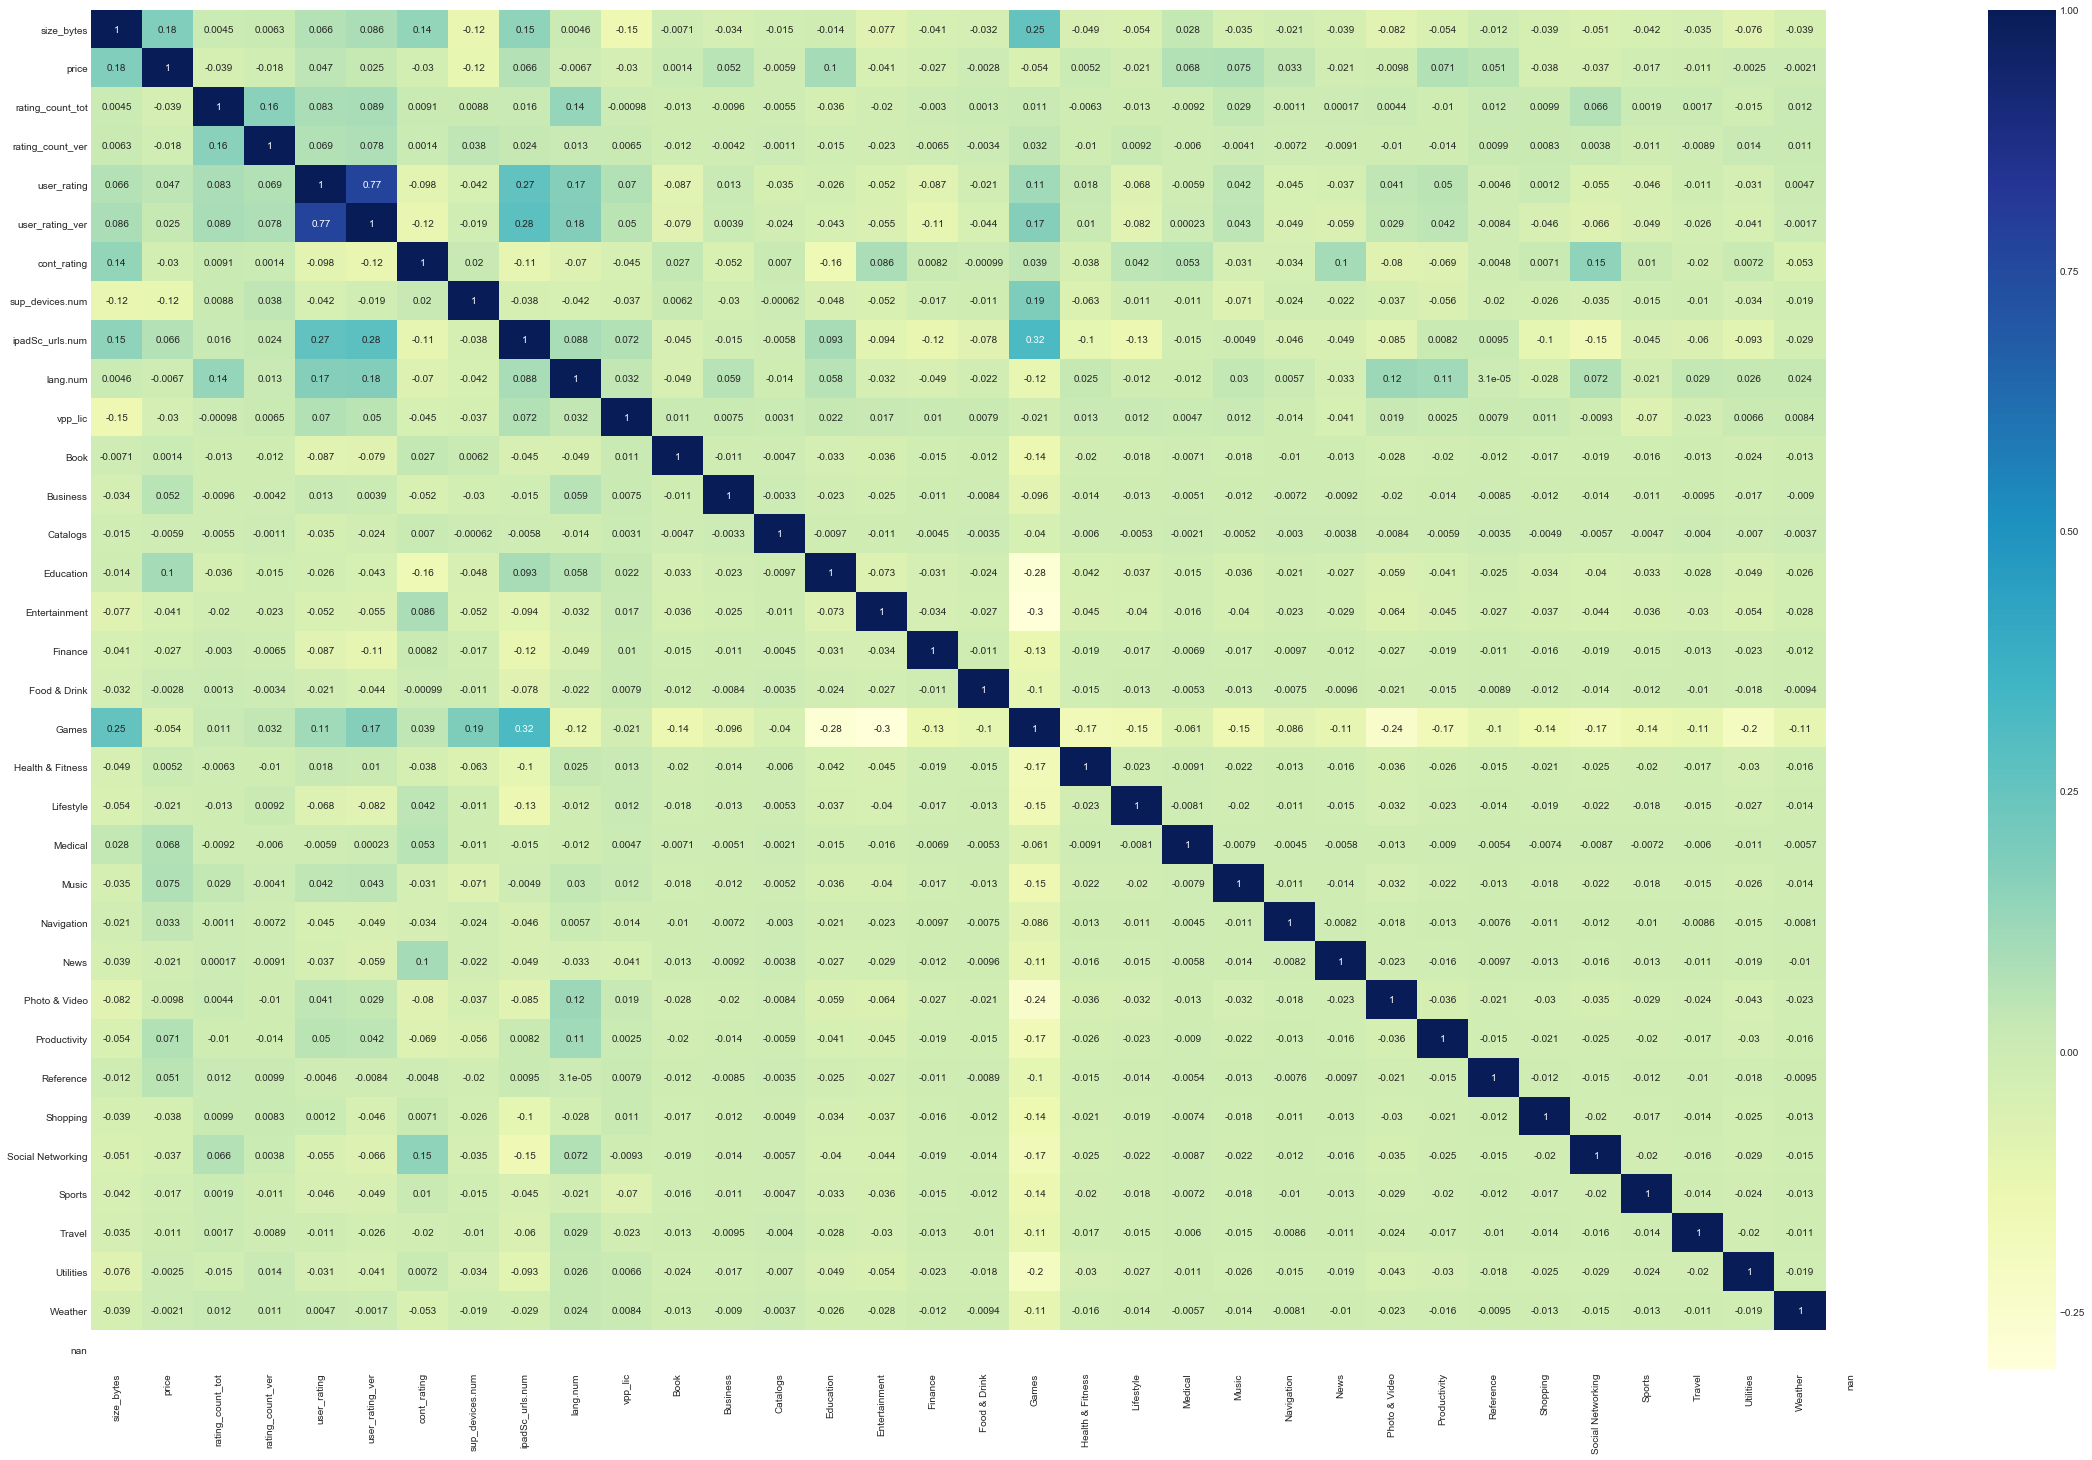

In [14]:
#  Plotting the heatmap to find correlation
numericDataSet = dataSet.drop(labels=['id','ver', 'track_name'], axis=True)

fig, ax = plt.subplots(figsize=(40,25))

sns.heatmap(numericDataSet.corr(), annot=True, cmap='YlGnBu')

In [15]:
# sns.pairplot(dataSet.drop(labels=['id', 'ver', 'track_name']), hue="prime_genre")

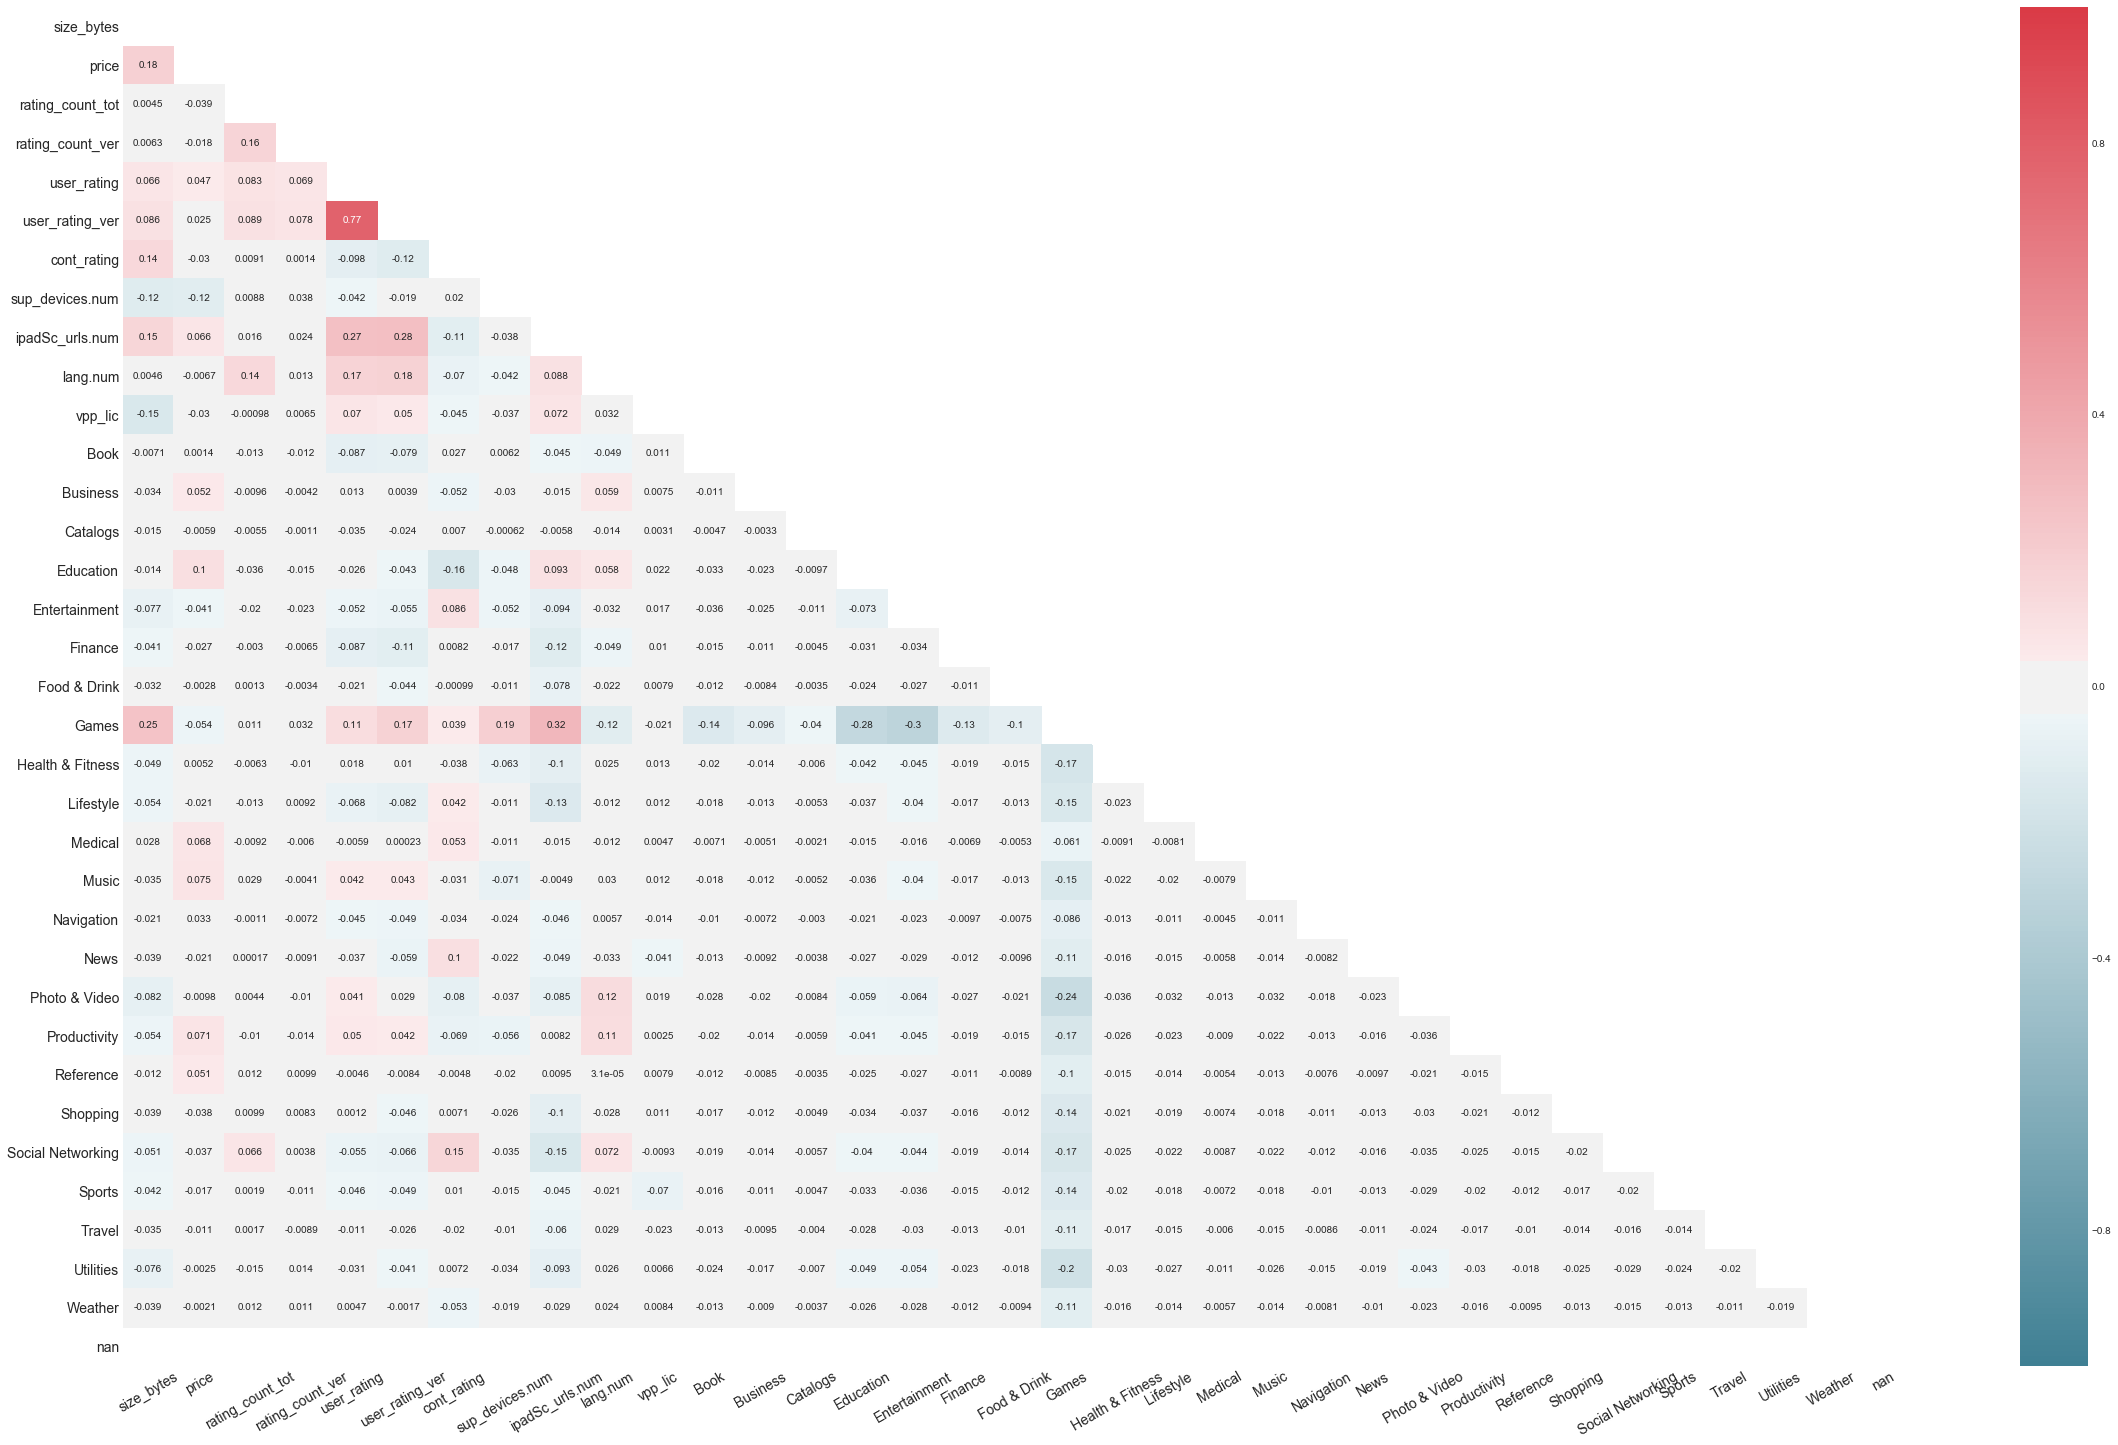

In [16]:
def correlation_heat_map(df):
   corrs = df.corr()

   # Set the default matplotlib figure size:
   fig, ax = plt.subplots(figsize=(40,25))

   # Generate a mask for the upper triangle (taken from the Seaborn example gallery):
   mask = np.zeros_like(corrs, dtype=np.bool)
   mask[np.triu_indices_from(mask)] = True

   # Plot the heatmap with Seaborn.
   # Assign the matplotlib axis the function returns. This allow us to resize the labels.
   cmap = sns.diverging_palette(220, 10, as_cmap=True)
   ax = sns.heatmap(corrs, mask=mask, annot=True, cmap=cmap, vmin=-1, vmax=1)

   # Resize the labels.
   ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
   ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

   # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
   plt.show()

correlation_heat_map(numericDataSet)

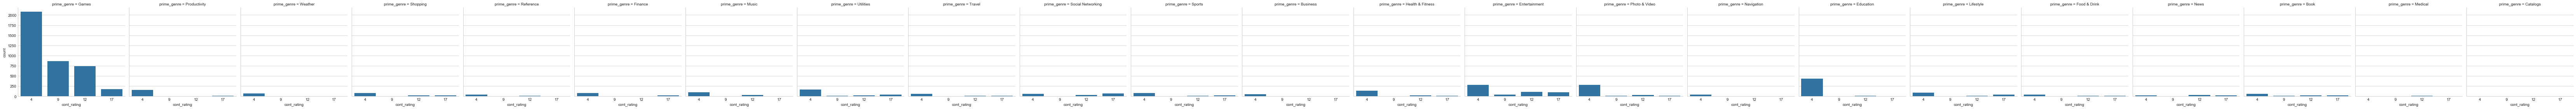

In [17]:
#  Plot the Prime Genres and the content rating for each

plt.figure(figsize=(10, 8))
sns.factorplot('cont_rating', col='prime_genre', data=dataSet,  
               kind="count", )

# sns.plt.legend()

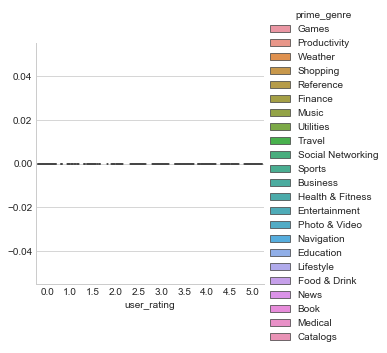

In [18]:
# Plot the Prime Genres and the user rating for all versions for each

plt.figure(figsize=(15, 8))
sns.factorplot('user_rating', data=dataSet,  
            hue="prime_genre", legend=True, kind="box")

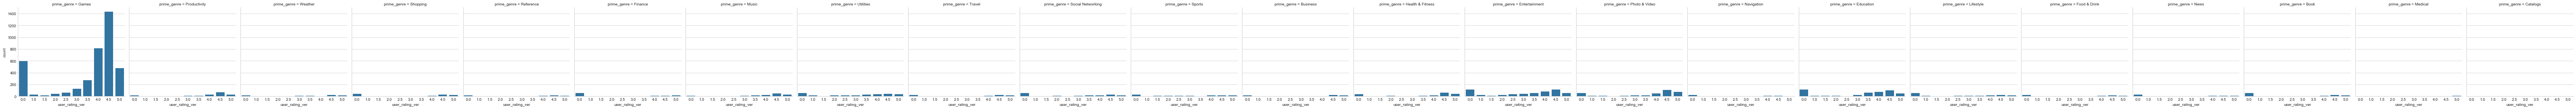

In [19]:
# Plot the Prime Genres and the user rating for current version for each

plt.figure(figsize=(10, 8))
sns.factorplot('user_rating_ver', col='prime_genre', data=dataSet,  
               kind="count", legend=True)

In [ ]:
# Plot the Prime Genres and the rating count total for each

plt.figure(figsize=(40,25))
sns.factorplot('ipadSc_urls.num', data=dataSet,  
               kind="count", hue='user_rating', legend=True)

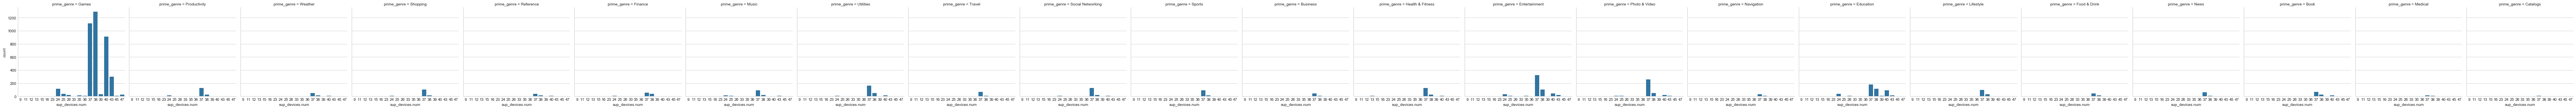

In [21]:
# Plot the Prime Genres and the number of supporting devices 

plt.figure(figsize=(10, 8))
sns.factorplot('sup_devices.num', col='prime_genre', data=dataSet,  
               kind="count", legend=True)

In [22]:
dataSet['lang.num'].unique()

array([10, 23,  3,  9, 45,  1, 19, 11,  6, 33,  2, 26, 29, 18, 16, 15,  5,
       21, 12,  7, 30, 13,  8,  0,  4, 43, 17, 32, 28, 35, 14, 36, 20, 22,
       31, 34, 40, 41, 25, 59, 56, 27, 24, 46, 47, 37, 42, 55, 39, 54, 58,
       69, 63, 75, 50, 68, 74])

In [23]:
ax.set(xlim=(10, 80))

[(10, 80)]

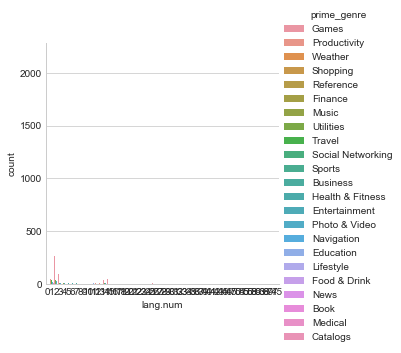

In [ ]:
# Plot the Prime Genres and the number of languages supported 

plt.figure(figsize=(40, 25))
sns.factorplot('lang.num', data=dataSet,  
               kind="count", hue ='prime_genre', legend=True)

In [ ]:
# Plot the size and user rating

plt.figure(figsize=(10, 8))
sns.factorplot(x='size_bytes', y='user_rating', data=dataSet,  
               kind="box", legend=True)

In [ ]:
dataSet['price_rounded']= [np.ceil(each) for each in dataSet['price']]

In [ ]:
# Plot the Prime Genres and the price

plt.figure(figsize=(10, 8))
sns.distplot(x='price_rounded', y = 'user_rating', data=dataSet,  
               kind="box", legend=True)

In [ ]:
# Plot the game Genre and the user rating by app

plt.figure(figsize=(10, 8))
sns.factorplot('user_rating', data=numericDataSet,  
               kind="count",hue = 'track_name', legend=True)

In [ ]:
#  Plot user rating and user rating for current version for all genres
plt.figure(figsize=(10, 8))
sns.factorplot('user_rating', data=dataSet,  
               kind="count",hue = 'prime_genre', legend=True)
sns.factorplot('user_rating_ver', data=dataSet,  
               kind="count",hue = 'prime_genre', legend=True)

# sns.distplot(dataSet['user_rating'])
